In [8]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


In [9]:
from bs4 import BeautifulSoup 


In [10]:
#scraping from web
req=requests.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm#")
soup=BeautifulSoup(req.content,"html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="Tr

In [16]:
#converting to dataframe
table = soup.find('table', {'class': 'table'})
rows = table.find_all('tr')
headers = [header.text.strip() for header in rows[0].find_all('th')]
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)
df = pd.DataFrame(data, columns=headers)
print(df)


                                                Party   Won Leading Total
0                        Bharatiya Janata Party - BJP   240       0   240
1                      Indian National Congress - INC    99       0    99
2                                Samajwadi Party - SP    37       0    37
3                 All India Trinamool Congress - AITC    29       0    29
4                     Dravida Munnetra Kazhagam - DMK    22       0    22
5                                  Telugu Desam - TDP    16       0    16
6                        Janata Dal  (United) - JD(U)    12       0    12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT     9       0     9
8   Nationalist Congress Party – Sharadchandra Paw...     8       0     8
9                                     Shiv Sena - SHS     7       0     7
10             Lok Janshakti Party(Ram Vilas) - LJPRV     5       0     5
11      Yuvajana Sramika Rythu Congress Party - YSRCP     4       0     4
12                         Rashtriya J

In [17]:
#rows
df.count()

Party      42
Won        42
Leading    42
Total      42
dtype: int64

In [18]:
#total number of rows and columns
df.shape

(43, 4)

In [19]:
#datatype
df.dtypes

Party      object
Won        object
Leading    object
Total      object
dtype: object

In [19]:
#first five
df.head()

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22


In [20]:
#last five
df.tail(5)

,Party,Won,Leading,Total
38,Apna Dal (Soneylal) - ADAL,1,0,1
39,AJSU Party - AJSUP,1,0,1
40,All India Majlis-E-Ittehadul Muslimeen - AIMIM,1,0,1
41,Independent - IND,7,0,7
42,None,None,None,None


In [21]:
df.describe()

,Party,Won,Leading,Total
count,42,42,42,42
unique,42,15,1,15
top,Bharatiya Janata Party - BJP,1,0,1
freq,1,17,42,17


In [22]:
#Rows contatining duplicate rows
duplicate=df[df.duplicated()]
print("Number of duplicated rows:",duplicate.shape)

Number of duplicated rows: (0, 4)


In [23]:
#find the null values
print(df.isnull().sum())

Party      1
Won        1
Leading    1
Total      1
dtype: int64


In [24]:
#drop missing values 
df=df.dropna()
df.count()

Party      42
Won        42
Leading    42
Total      42
dtype: int64

In [25]:
#dropping leading column
df=df.drop(['Leading'],axis=1)
df.head()

,Party,Won,Total
0,Bharatiya Janata Party - BJP,240,240
1,Indian National Congress - INC,99,99
2,Samajwadi Party - SP,37,37
3,All India Trinamool Congress - AITC,29,29
4,Dravida Munnetra Kazhagam - DMK,22,22


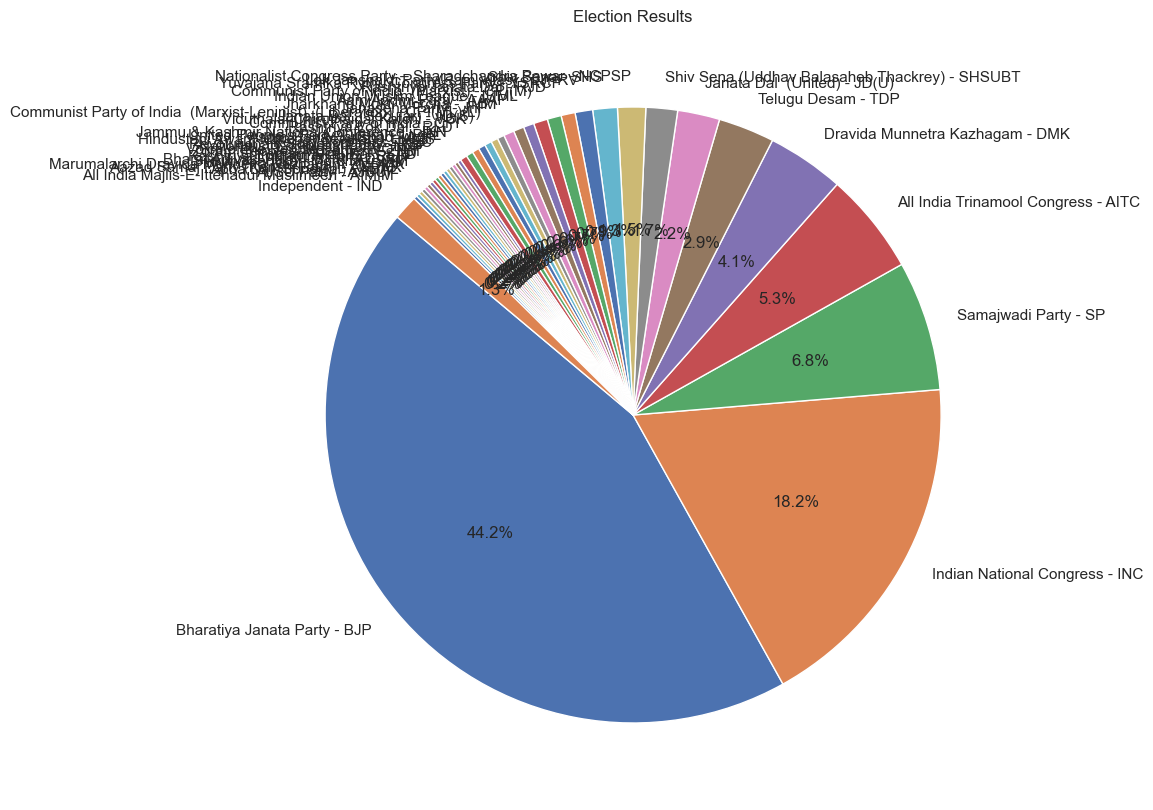

In [26]:
plt.figure(figsize=(10,10))
plt.pie(df['Won'], labels=df['Party'],autopct='%1.1f%%', startangle=140)
plt.title('Election Results')
plt.show()